<a href="https://colab.research.google.com/github/toohbias/W-Seminar/blob/main/Modell_AM_Modulation_Demodulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grundsätzliche Infos
## Aufbau des Programms
Das Programm gliedert sich in verschiedene Module, die die Spannung an einem bestimmten Punkt des Schaltkreises simulieren. In fast jedem Modul sind daher die Variablen mit einer Abkürzung benannt, die die Funktion des jeweiligen Moduls widerspiegelt.
## Nomenklatur
Die Funktion einer Variable sowie die Einheit wird als Kommentar neben der Variable beschrieben. Dennoch ist es sinnvoll, die Abkürzungen zu kennen, aus denen sich der Variablenname zusammensetzt.

**Elektrizität**
- `U` Spannung
- `I` Stromstärke
- `Q` Ladung
- `dI_dt` Änderungsrate des Stroms

**Bauteile**
- `C` Kondensator/Kapazität
- `L` Spule/Induktivität
- `R` Widerstand

**Abkürzungen**
- `nf` Niederfrequenz
- `hf` Hochfrequenz
- `zf` Zwischenfrequenz (bei der Modulation)
- `am` Amplitudenmodulation (Regeneration der Halbwelle)
- `dm` Demodulation
- `tp` Tiefpass
- `kp` Kopplung

Bei einfachen Modulen wird auf neue Variablen mit neuen Abkürzungen aus Performancegründen verzichtet (60 Mio. Elemente/Array)

Die Variablennamen setzen sich aus mehreren dieser Abkürzungen zusammen. So ist bspw. `U_L_nf` die Spannung im Niederfrequenzschwinkreis, die an der Spule abfällt.


In [17]:
# Modul zur Erstellung der Graphiken sowie für mathematische Operationen/Konstanten
import matplotlib.pyplot as plt
import numpy as np

# Zehnerpotenzen
milli = 1E-3
mikro = 1E-6
nano = 1E-9
piko = 1E-12

# Randwerte
dt = 5 * nano           # (s)   Zeitschritt
tf = 30 * milli         # (s)   Zeitraum

## 1. NF- und HF-Generatoren
Zuerst werden die Eingangssignale erzeugt. Dies erfolgt in der Simulation über verlustfreie Parallelschwingkreise.

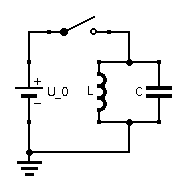

Resonanzfrequenz: 159.15494309189532 Hz


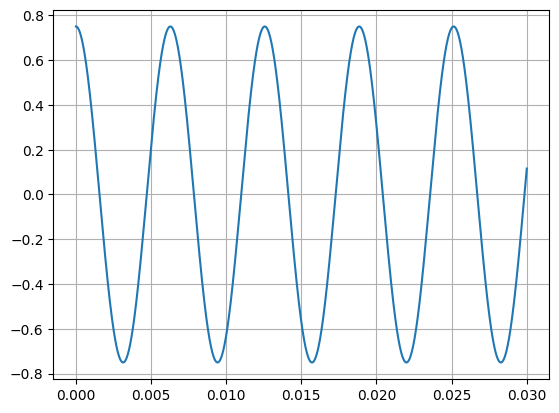

In [18]:
# NF-Schwingkreis

# Randwerte
C_nf = 1 * milli        # (F)   Kapazität
L_nf = 1 * milli        # (H)   Induktivität

# Ausgabe der Resonanzfrequenz
print('Resonanzfrequenz: ' + str(1 / (2 * np.pi * np.sqrt(L_nf * C_nf))) + ' Hz')

# Anfangswerte
U_nf_0 = 0.75           # (V)   Nennspannung der elektrischen Quelle

# Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
I_nf = 0.0              # (A)   Es fließt noch kein Strom
Q_nf = C_nf * U_nf_0    # (C)   Ladung an der Kondensatorplatte, die mit der Quelle verbunden ist

# Zwischenvariablen
U_C_nf_arr = [U_nf_0]   # (V)   Quelle lädt zuerst den Kondensator auf
U_L_nf = 0.0            # (V)   Spule sperrt
dI_dt_nf = 0.0          # (A/s) Änderungsrate des elektrischen Stroms

# Iteration
while t[-1] < tf:
  I_nf_alt, Q_nf_alt = I_nf, Q_nf

  # Spielregeln
  U_C_nf = Q_nf_alt / C_nf
  U_L_nf = -U_C_nf
  dI_dt_nf = U_L_nf / L_nf

  I_nf_neu = I_nf_alt + dI_dt_nf * dt
  Q_nf_neu = Q_nf_alt + I_nf_alt * dt

  # Zwischenschritte
  I_nf = I_nf_neu
  Q_nf = Q_nf_neu

  U_C_nf_arr.append(U_C_nf)
  t.append(t[-1] + dt)

plt.plot(t, U_C_nf_arr)
plt.grid(True)
plt.show()

Resonanzfrequenz: 3183.098861837907 Hz


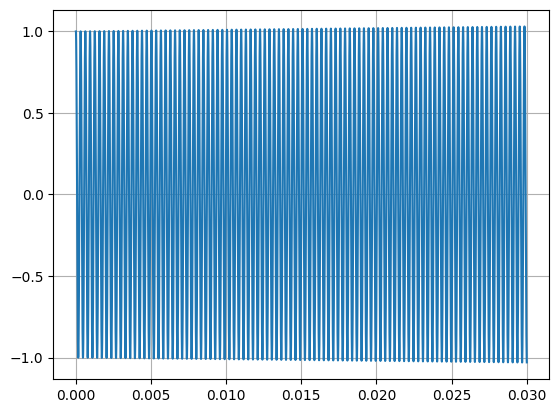

In [19]:
# HF-Schwingkreis

# Randwerte
C_hf = 50 * mikro       # (F)   Kapazität
L_hf = 50 * mikro       # (H)   Induktivität

# Ausgabe der Resonanzfrequenz
print('Resonanzfrequenz: ' + str(1 / (2 * np.pi * np.sqrt(L_hf * C_hf))) + ' Hz')

# Anfangswerte
U_hf_0 = 1.0            # (V)   Nennspannung der elektrischen Quelle

# Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
I_hf = 0.0              # (A)   Es fließt noch kein Strom
Q_hf = C_hf * U_hf_0    # (C)   Ladung an der Kondensatorplatte, die mit der Quelle verbunden ist

# Zwischenvariablen
U_C_hf_arr = [U_hf_0]   # (V)   Quelle lädt zuerst den Kondensator auf
U_L_hf = 0.0            # (V)   Spule sperrt
dI_dt_hf = 0.0          # (A/s) Änderungsrate des elektrischen Stroms

# Iteration
while t[-1] < tf:
  I_hf_alt, Q_hf_alt = I_hf, Q_hf

  # Spielregeln
  U_C_hf = Q_hf_alt / C_hf
  U_L_hf = -U_C_hf
  dI_dt_hf = U_L_hf / L_hf

  I_hf_neu = I_hf_alt + dI_dt_hf * dt
  Q_hf_neu = Q_hf_alt + I_hf_alt * dt

  # Zwischenschritte
  I_hf = I_hf_neu
  Q_hf = Q_hf_neu

  U_C_hf_arr.append(U_C_hf)
  t.append(t[-1] + dt)

plt.plot(t, U_C_hf_arr)
plt.grid(True)
plt.show()

# Modulation

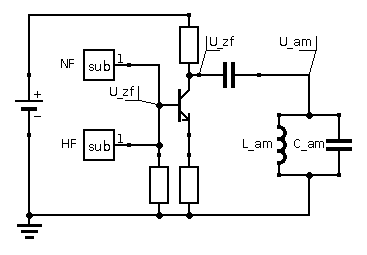

## 2. Überlagerung der Signale & Unterdrückung einer Halbwelle
### Überlagerung
Nun werden die beiden Eingangssignale überlagert. Dabei handelt es sich noch nicht um Modulation, sondern lediglich um sinusähnliche Schwingungen.

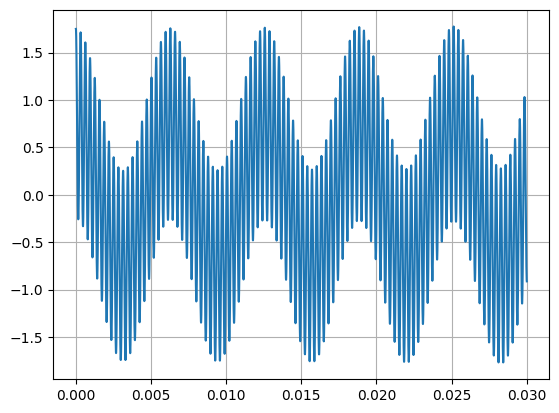

In [43]:
# Additive "Modulation": Überlagerung der Wellen
U_C_zf_arr = []
for y in range(len(t)):
  U_C_zf_arr.append(U_C_nf_arr[y] + U_C_hf_arr[y])

plt.plot(t, U_C_zf_arr)
plt.grid(True)
plt.show()

### Unterdrückung
Im nächsten Schritt wird eine Halbwelle durch einen Transistor abgeschnitten. Dies geschieht in der Praxis dadurch, dass sich die untere Halbwelle unterhalb des Arbeitspunktes des Transistors befindet, er das Signal also nicht weiterleitet. In der Simulation wird vereinfacht jeder Wert unter 0 abgeschnitten. Der Transistor invertiert außerdem die Spannung, was auch in der Simulation beachtet wird.

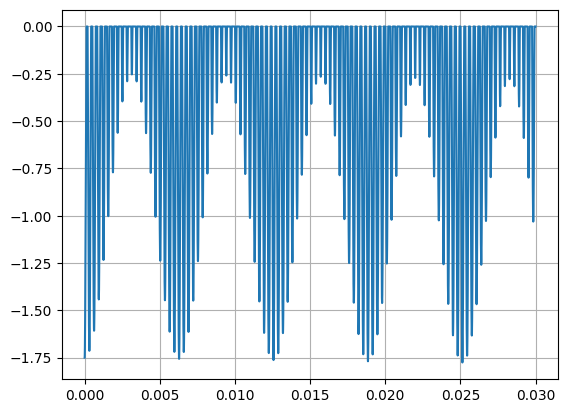

In [44]:
for y in range(len(t)):
  # Abschneiden der unteren Halbwelle
  if U_C_zf_arr[y] < 0:
    U_C_zf_arr[y] = 0.0

  # Inversion der Spannung
  U_C_zf_arr[y] = -U_C_zf_arr[y]

plt.plot(t, U_C_zf_arr)
plt.grid(True)
plt.show()

## 3. Regeneration der Halbwelle mit einem Schwingkreis
Ein Schwingkreis mit der selben Resonanzfrequenz wie das HF-Eingangssignal wird im Takt des Signals im vorherigen Schritt angestoßen und regeneriert so die fehlende Halbwelle. Das Ergebnis ist ein amplitudenmoduliertes Signal.

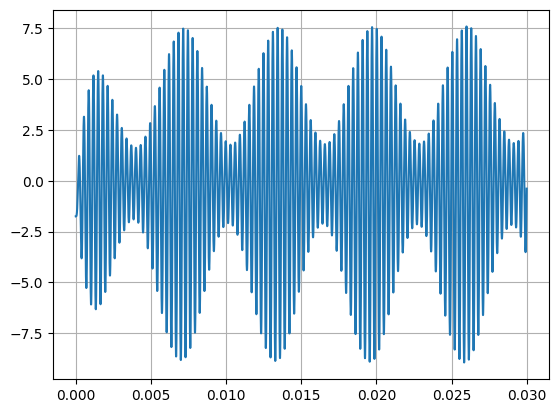

In [45]:
# Regeneration der oberen Halbwelle durch einen weiteren Schwingkreis

# Randwerte
C_am = C_hf             # (F)   Dieser Schwingkreis soll die gleiche
L_am = L_hf             # (H)   Resonanzfrequenz haben wie der HF-Schwingkreis,
R_am = 0.1              # (Ω)   braucht aber einen Widerstand um abzuschwingen

# Anfangswerte
U_am_0 = U_C_zf_arr[0]  # (V)   Eingangsspannung in den Schwingkreis am ersten Zeitpunkt

# Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
I_am = 0.0              # (A)   Es fließt noch kein Strom
Q_am = C_am * U_am_0    # (C)   Ladung an der Kondensatorplatte, die mit der Quelle verbunden ist

# Zwischenvariablen
U_C_am_arr = [U_am_0]   # (V)   Quelle lädt zuerst den Kondensator auf
U_L_am = 0.0            # (V)   Spule sperrt
U_R_am = 0.0            # (V)   Spannungsabfall am Widerstand
dI_dt_am = 0.0          # (A/s) Änderungsrate des elektrischen Stroms

# Iteration
while t[-1] < tf:
  I_am_alt, Q_am_alt = I_am, Q_am

  # Spielregeln
  U_C_am = Q_am_alt / C_am
  U_R_am = R_am * I_am_alt
  U_L_am = U_C_zf_arr[len(t) - 1] - (U_C_am + U_R_am)
  dI_dt_am = U_L_am / L_am

  I_am_neu = I_am_alt + dI_dt_am * dt
  Q_am_neu = Q_am_alt + I_am_alt * dt

  # Zwischenschritte
  I_am = I_am_neu
  Q_am = Q_am_neu

  U_C_am_arr.append(U_C_am)
  t.append(t[-1] + dt)

plt.plot(t, U_C_am_arr)
plt.grid(True)
plt.show()

# Demodulation

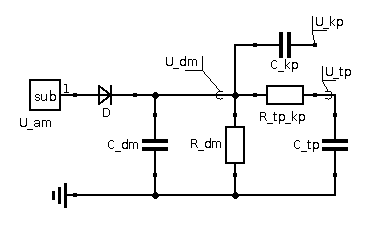

## 1. Gleichrichtung des modulierten Eingangssignals
Um das Signal weiterverarbeiten zu können, muss es erst einmal gleichgerichtet werden. In der Praxis geschieht dies über eine Diode, in der Simulation wird jeder Wert unter 0 abgeschnitten.

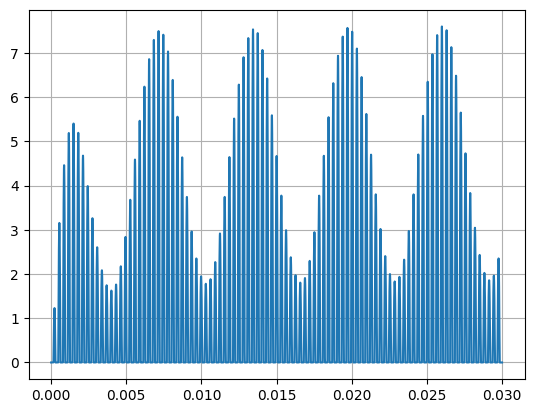

In [46]:
# AM-Signal gleichrichten
for y in range(len(t)):
  if U_C_am_arr[y] < 0:
    U_C_am_arr[y] = 0.0

plt.plot(t, U_C_am_arr)
plt.grid(True)
plt.show()

## 2. Verbindung der Scheitelpunkte der positiven Halbwelle zur Hüllkurve
Um die Trägerfrequenz zu entfernen, geht das Signal zuerst durch einen Kondensator. Durch seine langsame Entladung kann schon ein Großteil der HF-Frequenzen "ausgeglättet" werden. Hier wird das Ladungs- und Entladungsverhalten eines Kondensators simuliert.

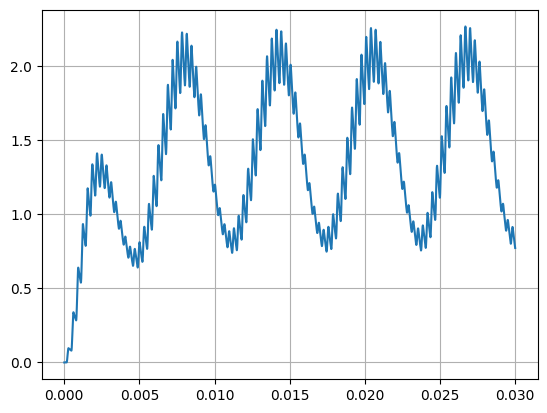

In [47]:
# Kondensator folgt der Hüllkurve

# Randwerte
C_dm = 100 * mikro      # (F)   Kapazität
R_dm = 10.0             # (Ω)   Widerstand

# Anfangswerte
U_dm_0 = U_C_am_arr[0]  # (V)   Eingansspannung in den Kondensator

# Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
Q_dm = C_dm * U_dm_0    # (C)   Ladung an der Kondensatorplatte, die mit der Quelle verbunden ist

# Zwischenvariablen
U_C_dm_arr = [U_dm_0]   # (V)   Quelle lädt zuerst den Kondensator auf
U_R_dm = 0.0            # (V)   Spannung, mit der sich der Kondensator über den Widerstand entlädt
I_dm = 0.0              # (A)   Es fließt noch kein Strom

# Iteration
while t[-1] < tf:
  Q_dm_alt = Q_dm

  # Spielregeln
  U_C_dm = Q_dm_alt / C_dm
  U_R_dm = U_C_am_arr[len(t) - 1] - U_C_dm
  I_dm = U_R_dm / R_dm

  Q_dm_neu = Q_dm_alt + I_dm * dt

  # Zwischenschritte
  Q_dm = Q_dm_neu

  U_C_dm_arr.append(U_C_dm)
  t.append(t[-1] + dt)

plt.plot(t, U_C_dm_arr)
plt.grid(True)
plt.show()

## 3. Tiefpassfilter zur Glättung
Die finale Glättung erfolgt über einen Tiefpass. Dabei wird ausgenutzt, dass ein Kondensator bei hoher Frequenz einen niedrigen kapazitiven Widerstand hat. Hohe Frequenzen werden also durch den niedrigen Widerstand nach Masse gezogen, während niedrige Frequenzen unbetroffen bleiben.

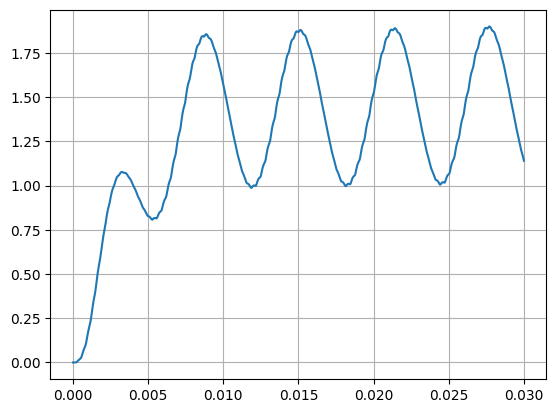

In [48]:
# Tiefpassfilter

# Randwerte
C_tp = 100 * mikro      # (F)   Kapazität
R_tp = 10.0             # (Ω)   Widerstand

# Anfangswerte
U_tp_0 = U_C_dm_arr[0]  # (V)   Eingansspannung aus dem Kondensator am ersten Zeitpunkt

# Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
Q_tp = 0.0              # (C)   Kondensator ist am Anfang ungeladen

# Zwischenvariablen
U_C_tp_arr = [0.0]      # (V)   Kondensator ist am Anfang ungeladen
U_R_tp_arr = [U_tp_0]   # (V)   Eingangssignal fließt zuerst durch Widerstand
I_tp = 0.0              # (A)   Es fließt noch kein Strom

# Iteration
while t[-1] < tf:
  Q_tp_alt = Q_tp

  # Spielregeln
  U_C_tp = Q_tp_alt / C_tp
  U_R_tp = U_C_dm_arr[len(t) - 1] - U_C_tp
  I_tp = U_R_tp / R_tp

  Q_tp_neu = Q_tp_alt + I_tp * dt

  # Zwischenschritte
  Q_tp = Q_tp_neu

  U_C_tp_arr.append(U_C_tp)
  U_R_tp_arr.append(U_R_tp)
  t.append(t[-1] + dt)

plt.plot(t, U_C_tp_arr)
plt.grid(True)
plt.show()

## 4. Entkoppelung des Gleichspannungsanteils
Dadurch, dass die Platten beim Kondensator voneinander getrennt sind und sich die Ladungen nur über ein elektrisches Feld bei Wechselspannung zwischen ihnen bewegen können, kann der Gleichspannungsanteil des Signals mit einem Kondensator "ausgekoppelt" werden. Im Schaltplan ist der Koppelkondensator vor dem Widerstand des Hochpasses, wodurch auch dieser in die Simulation einfließen muss. Dies ist hilfreich, da ein Widerstand notwendig für die Bestimmung der Stromstärke ist, wodurch sich wiederum die Ladung und damit die Spannung am Kondensator bestimmen lässt.

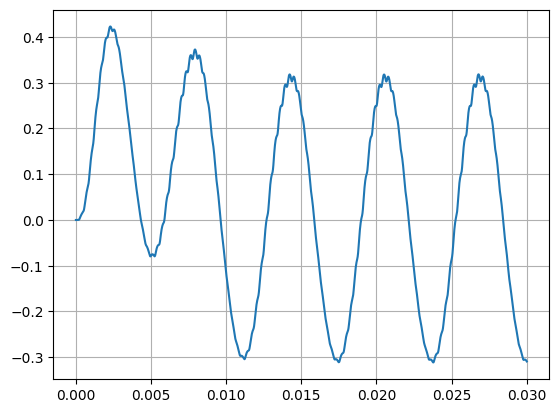

In [49]:
# Gleichspannungsanteil auskoppeln

# Randwerte
C_kp = 100 * mikro      # (F)   Kapazität
R_kp = R_tp             # (Ω)   Widerstand zurückrechnen

# Anfangswerte
U_kp_0 = U_R_tp_arr[0]  # (V)   Eingangsspannung aus dem Tiefpass zum ersten Zeitpunkt

# Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
Q_kp = 0.0              # (C)   Kondensator ist am Anfang ungeladen

# Zwischenvariablen
U_C_kp_arr = [0.0]      # (V)   Kondensator ist am Anfang ungeladen
U_R_kp = U_kp_0         # (V)   Signal fließt durch den Widerstand zurück zum Koppelkondensator
I_kp = 0.0              # (A)   Es fließt noch kein Strom

# Iteration
while t[-1] < tf:
  Q_kp_alt = Q_kp

  # Spielregeln
  U_C_kp = Q_kp_alt / C_kp
  U_R_kp = U_R_tp_arr[len(t) - 1] - U_C_kp
  I_kp = U_R_kp / R_kp

  Q_kp_neu = Q_kp_alt + I_kp * dt

  # Zwischenschritte
  Q_kp = Q_kp_neu

  U_C_kp_arr.append(U_C_kp)
  t.append(t[-1] + dt)

plt.plot(t, U_C_kp_arr)
plt.grid(True)
plt.show()